# WHO COVID-19 Global Data Analysis

Importing required resources

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('WHO-COVID-19-global-daily-data.csv')
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,04-01-2020,AF,Afghanistan,EMR,NaN,0,NaN,0
1,04-01-2020,DZ,Algeria,AFR,NaN,0,NaN,0
2,04-01-2020,AL,Albania,EUR,NaN,0,NaN,0
3,04-01-2020,AI,Anguilla,AMR,NaN,0,NaN,0
4,04-01-2020,AS,American Samoa,WPR,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...
524635,28-12-2025,BH,Bahrain,EMR,NaN,696614,NaN,1536
524636,28-12-2025,AG,Antigua and Barbuda,AMR,NaN,9106,NaN,146
524637,28-12-2025,BD,Bangladesh,SEAR,NaN,2052275,NaN,29531
524638,28-12-2025,AZ,Azerbaijan,EUR,NaN,836510,NaN,10353


# Data Cleaning

In [5]:
df['New_cases']=df['New_cases'].fillna(0)
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,04-01-2020,AF,Afghanistan,EMR,0.0,0,NaN,0
1,04-01-2020,DZ,Algeria,AFR,0.0,0,NaN,0
2,04-01-2020,AL,Albania,EUR,0.0,0,NaN,0
3,04-01-2020,AI,Anguilla,AMR,0.0,0,NaN,0
4,04-01-2020,AS,American Samoa,WPR,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...
524635,28-12-2025,BH,Bahrain,EMR,0.0,696614,NaN,1536
524636,28-12-2025,AG,Antigua and Barbuda,AMR,0.0,9106,NaN,146
524637,28-12-2025,BD,Bangladesh,SEAR,0.0,2052275,NaN,29531
524638,28-12-2025,AZ,Azerbaijan,EUR,0.0,836510,NaN,10353


In [6]:
df['New_deaths']=df['New_deaths'].fillna(0)
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,04-01-2020,AF,Afghanistan,EMR,0.0,0,0.0,0
1,04-01-2020,DZ,Algeria,AFR,0.0,0,0.0,0
2,04-01-2020,AL,Albania,EUR,0.0,0,0.0,0
3,04-01-2020,AI,Anguilla,AMR,0.0,0,0.0,0
4,04-01-2020,AS,American Samoa,WPR,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...
524635,28-12-2025,BH,Bahrain,EMR,0.0,696614,0.0,1536
524636,28-12-2025,AG,Antigua and Barbuda,AMR,0.0,9106,0.0,146
524637,28-12-2025,BD,Bangladesh,SEAR,0.0,2052275,0.0,29531
524638,28-12-2025,AZ,Azerbaijan,EUR,0.0,836510,0.0,10353


# Exploratory Data Analysis

1.	Which countries had the highest case counts?

In [28]:
result= ( 
    df.groupby('Country')['Cumulative_cases']
    .max()
    .reset_index(name='Maximum Cases')
    .sort_values(by='Maximum Cases', ascending=False)
)
result.head(20)    

,Country,Maximum Cases
229,United States of America,103436829
42,China,99381761
96,India,45056126
72,France,39055656
78,Germany,38437938
28,Brazil,37943307
175,Republic of Korea,34571873
111,Japan,33803572
109,Italy,26969562
226,United Kingdom of Great Britain and Northern I...,25103762


In [8]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [10]:
import plotly.express as px

fig = px.choropleth(
    result,
    locations="Country",
    locationmode="country names",
    color="Maximum Cases",   
    hover_name="Country",
    color_continuous_scale="Reds",
    title="World Map of Maximum COVID-19 Cases by Country"
)

fig.show()



C:\Users\Abhishek\AppData\Local\Temp\ipykernel_14376\450863679.py:3: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


USA,China,India,France,Germany,Brazil,Republic of Korea,Japan,Italy and UK were the countries with maximum covid cases.
It seems that these countries have large population and large number of people who does international and domestic 
travel that's why surge in case is observed

2.	How did the virus spread over time (global timeline)?

In [11]:
df_cases=(
    df[df['Date_reported'].isin(['04-01-2020','04-01-2021','04-01-2022','04-01-2023','04-01-2024','04-01-2025'])]
    .groupby('Date_reported')['New_cases']
    .sum()
    .reset_index(name='Total_New_Cases')
)
df_cases

,Date_reported,Total_New_Cases
0,04-01-2020,3.0
1,04-01-2021,517835.0
2,04-01-2022,1183782.0
3,04-01-2023,1633608.0
4,04-01-2024,1634.0
5,04-01-2025,4.0


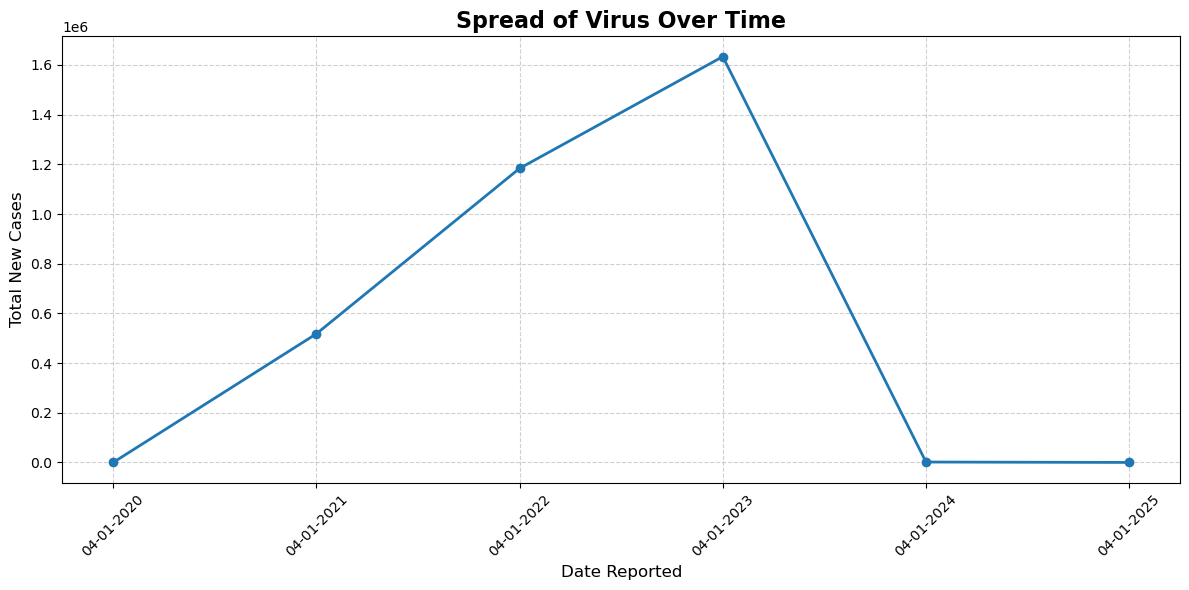

In [12]:

plt.figure(figsize=(12, 6))

plt.plot(
    df_cases['Date_reported'],
    df_cases['Total_New_Cases'],
    linewidth=2,
    marker='o',
    linestyle='-'
)

plt.title('Spread of Virus Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date Reported', fontsize=12)
plt.ylabel('Total New Cases', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


This analysis shows new cases of covid-19 spread almost linearly since 2020 to 2023. Sudden fall of cases in 2024 due to termination of reporting of new cases and reduction in testing frequency in the major regions like West paific.Also till this time vaccines were being availed to people and cases reduced significantly.

3.	Which region had the fastest recovery rate?

In [13]:
df['WHO_region'].unique()

array(['EMR', 'AFR', 'EUR', 'AMR', 'WPR', 'SEAR', 'OTHER'], dtype=object)

In [14]:
df_EMR=(

    df[(df['Date_reported'].isin(['04-01-2020','04-01-2021','04-01-2022','04-01-2023','04-01-2024','04-01-2025']))
       & (df['WHO_region']=='EMR')]
    .groupby('Date_reported')['New_cases']
    .sum()
    .reset_index(name='Total_New_Cases')
)
df_EMR

,Date_reported,Total_New_Cases
0,04-01-2020,0.0
1,04-01-2021,22591.0
2,04-01-2022,18064.0
3,04-01-2023,532.0
4,04-01-2024,0.0
5,04-01-2025,0.0


In [15]:
df_AFR=(

    df[(df['Date_reported'].isin(['04-01-2020','04-01-2021','04-01-2022','04-01-2023','04-01-2024','04-01-2025']))
       & (df['WHO_region']=='AFR')]
    .groupby('Date_reported')['New_cases']
    .sum()
    .reset_index(name='Total_New_Cases')
)
df_AFR

,Date_reported,Total_New_Cases
0,04-01-2020,0.0
1,04-01-2021,17840.0
2,04-01-2022,33545.0
3,04-01-2023,334.0
4,04-01-2024,0.0
5,04-01-2025,0.0


In [16]:
df_EUR=(

    df[(df['Date_reported'].isin(['04-01-2020','04-01-2021','04-01-2022','04-01-2023','04-01-2024','04-01-2025']))
       & (df['WHO_region']=='EUR')]
    .groupby('Date_reported')['New_cases']
    .sum()
    .reset_index(name='Total_New_Cases')
)
df_EUR

,Date_reported,Total_New_Cases
0,04-01-2020,2.0
1,04-01-2021,151893.0
2,04-01-2022,464562.0
3,04-01-2023,50851.0
4,04-01-2024,0.0
5,04-01-2025,0.0


In [17]:
df_AMR=(

    df[(df['Date_reported'].isin(['04-01-2020','04-01-2021','04-01-2022','04-01-2023','04-01-2024','04-01-2025']))
       & (df['WHO_region']=='AMR')]
    .groupby('Date_reported')['New_cases']
    .sum()
    .reset_index(name='Total_New_Cases')
)
df_AMR

,Date_reported,Total_New_Cases
0,04-01-2020,0.0
1,04-01-2021,291333.0
2,04-01-2022,586402.0
3,04-01-2023,42551.0
4,04-01-2024,0.0
5,04-01-2025,0.0


In [18]:
df_WPR=(

    df[(df['Date_reported'].isin(['04-01-2020','04-01-2021','04-01-2022','04-01-2023','04-01-2024','04-01-2025']))
       & (df['WHO_region']=='WPR')]
    .groupby('Date_reported')['New_cases']
    .sum()
    .reset_index(name='Total_New_Cases')
)
df_WPR

,Date_reported,Total_New_Cases
0,04-01-2020,1.0
1,04-01-2021,14514.0
2,04-01-2022,38606.0
3,04-01-2023,1539129.0
4,04-01-2024,850.0
5,04-01-2025,3.0


In [19]:
df_SEAR=(

    df[(df['Date_reported'].isin(['04-01-2020','04-01-2021','04-01-2022','04-01-2023','04-01-2024','04-01-2025']))
       & (df['WHO_region']=='SEAR')]
    .groupby('Date_reported')['New_cases']
    .sum()
    .reset_index(name='Total_New_Cases')
)
df_SEAR

,Date_reported,Total_New_Cases
0,04-01-2020,0.0
1,04-01-2021,19664.0
2,04-01-2022,42603.0
3,04-01-2023,211.0
4,04-01-2024,784.0
5,04-01-2025,1.0


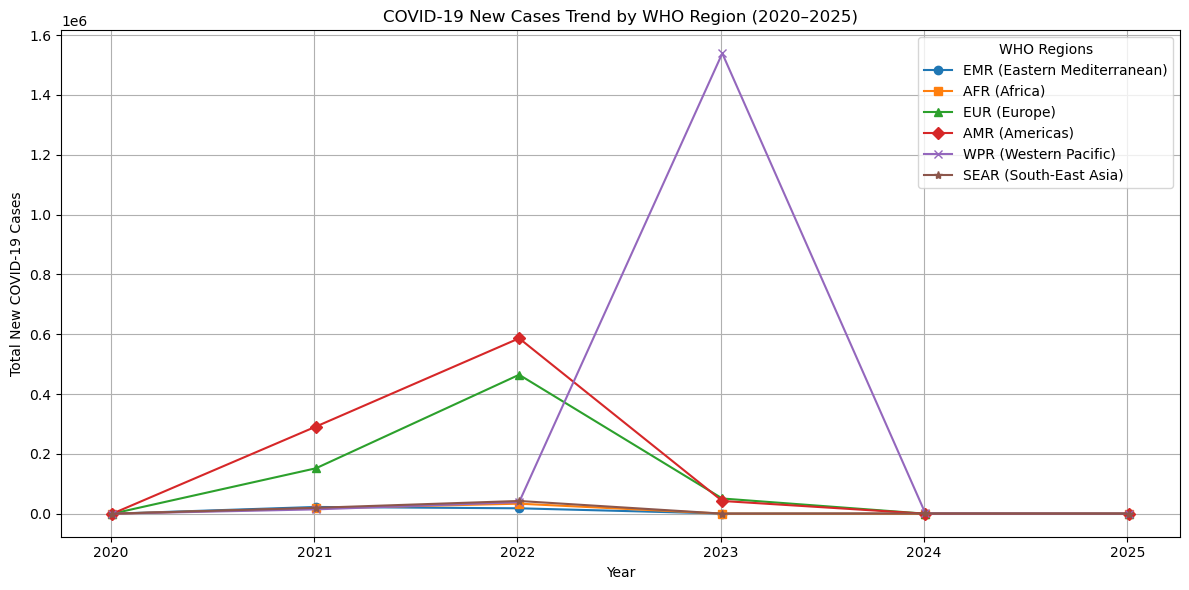

In [27]:
for d in [df_EMR, df_AFR, df_EUR, df_AMR, df_WPR, df_SEAR]:
    d['Date_reported'] = pd.to_datetime(d['Date_reported'], format='%d-%m-%Y')
    d.sort_values('Date_reported', inplace=True)
plt.figure(figsize=(12, 6))

plt.plot(df_EMR['Date_reported'], df_EMR['Total_New_Cases'],
         marker='o', label='EMR (Eastern Mediterranean)')

plt.plot(df_AFR['Date_reported'], df_AFR['Total_New_Cases'],
         marker='s', label='AFR (Africa)')

plt.plot(df_EUR['Date_reported'], df_EUR['Total_New_Cases'],
         marker='^', label='EUR (Europe)')

plt.plot(df_AMR['Date_reported'], df_AMR['Total_New_Cases'],
         marker='D', label='AMR (Americas)')

plt.plot(df_WPR['Date_reported'], df_WPR['Total_New_Cases'],
         marker='x', label='WPR (Western Pacific)')

plt.plot(df_SEAR['Date_reported'], df_SEAR['Total_New_Cases'],
         marker='*', label='SEAR (South-East Asia)')

plt.xlabel('Year')
plt.ylabel('Total New COVID-19 Cases')
plt.title('COVID-19 New Cases Trend by WHO Region (2020–2025)')
plt.legend(title='WHO Regions')
plt.grid(True)
plt.tight_layout()

plt.show()

The Western Pacific Region shows a rapid decline in reported cases after major surges, which can be attributed largely to high vaccination coverage, effective public health measures, and prior epidemic preparedness. However, the apparent ‘high recovery rate’ is also influenced by changes in testing intensity and reporting practices after 2023. Therefore, the trend reflects a combination of real epidemiological improvement and data reporting dynamics.

# Insights

1) The high COVID-19 case counts observed in countries like the USA, India, and major European nations are influenced by a combination of large population bases, extensive domestic and international travel, high urban density, and robust testing infrastructure. While mobility and population size contributed to rapid transmission, higher testing and reporting capacity also played a significant role in the observed surge in reported cases.

2) This analysis indicates a generally increasing trend in reported new COVID-19 cases from 2020 to 2023 across major WHO regions. The apparent decline in cases observed in 2024 is influenced by multiple factors, including reduced testing frequency and changes in reporting practices, particularly in regions such as the Western Pacific. Additionally, widespread vaccine availability and high vaccination coverage by this period contributed to a significant reduction in severe infections and transmission, leading to lower reported case counts.

3) The Western Pacific Region shows a rapid decline in reported COVID-19 cases following major surges, which can largely be attributed to high vaccination coverage, effective public health interventions, and prior epidemic preparedness. However, the apparent ‘high recovery rate’ is also influenced by changes in testing intensity and reporting practices after 2023. Consequently, the observed trend reflects a combination of genuine epidemiological improvement and evolving data reporting dynamics.